In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv(r'C:\Users\LENOVO\Desktop\churn analysis\customer churn.csv')

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.shape

(7043, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Replacing blanks with 0 in Total charges as their tenur is 0

In [7]:
df['TotalCharges']=df['TotalCharges'].replace(" ","0")

Changing data type of tatal charges from object to float 

In [8]:
df['TotalCharges']=df['TotalCharges'].astype(float)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [10]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [11]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
df['customerID'].duplicated().sum()

np.int64(0)

Creating a function for Binary Mapping to better understanding as senior citizen is represented as 0/1.


In [14]:
def conv(value):
     if value==1:
        return "yes"
     else:
        return "no"

In [15]:
df['SeniorCitizen']=df['SeniorCitizen'].apply(conv)

In [16]:
df.head(21)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,no,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,no,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,no,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,no,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,no,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [17]:
df['SeniorCitizen'].nunique()

2

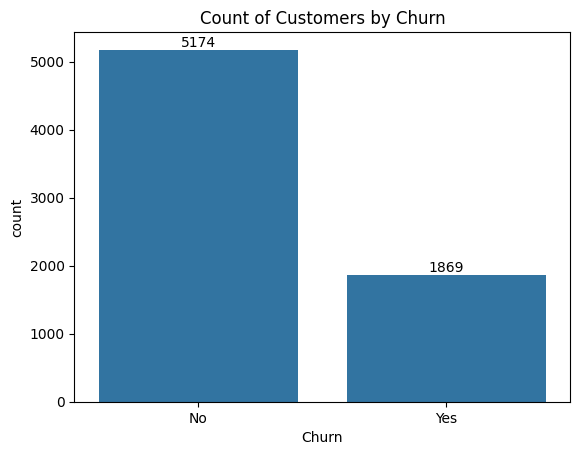

In [18]:
ax=sns.countplot(x=df['Churn'],data=df)
ax.bar_label(ax.containers[0])
plt.title('Count of Customers by Churn')
plt.show()

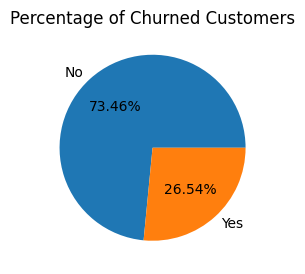

In [19]:
plt.figure(figsize=(3,4))
gb=df.groupby('Churn').agg({'Churn':"count"})
plt.pie(gb['Churn'],labels=gb.index, autopct="%1.2f%%")
plt.title('Percentage of Churned Customers')
plt.show()

This pie chart shows that 26.54% custmers have churned out,let's fint out the reason behind this loss.

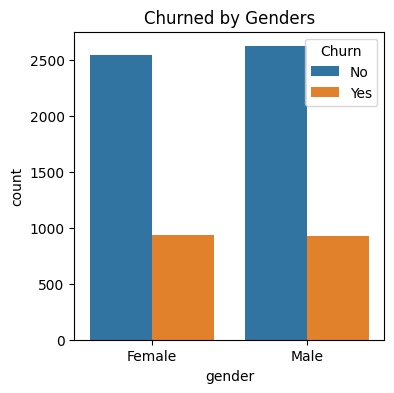

In [20]:
##Lets check on the basis of gender
plt.figure(figsize=(4,4))
sns.countplot(x='gender',data=df,hue='Churn')
plt.title('Churned by Genders')
plt.show()


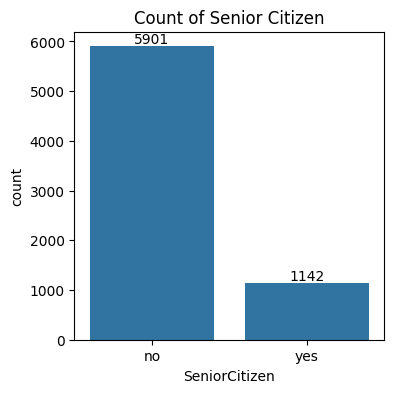

In [21]:
##Lets check on the basis of Senior citizen
plt.figure(figsize=(4,4))
ax=sns.countplot(x='SeniorCitizen',data=df)
ax.bar_label(ax.containers[0])
plt.title('Count of Senior Citizen')
plt.show()

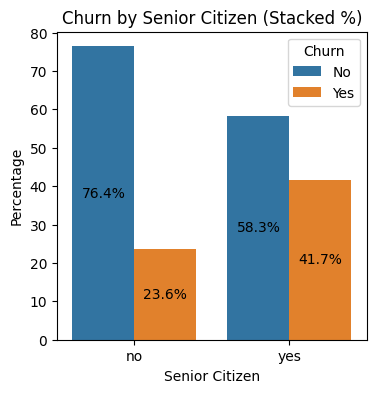

In [22]:
# Calculate percentage
pivot = df.groupby(['SeniorCitizen', 'Churn']).size().reset_index(name='Count')
pivot['Percentage'] = pivot.groupby('SeniorCitizen')['Count'].transform(lambda x: (x / x.sum()) * 100)

# Plot
plt.figure(figsize=(4, 4))
sns.barplot(x='SeniorCitizen', y='Percentage', hue='Churn', data=pivot)

plt.title('Churn by Senior Citizen (Stacked %)')
plt.ylabel('Percentage')
plt.xlabel('Senior Citizen')
plt.legend(title='Churn', loc='upper right')

# Display percentages on bars
for container in plt.gca().containers:
    plt.bar_label(container, fmt='%.1f%%', label_type='center')

plt.show()

Comparativly a greater percentage of people in senior citizen have churned.

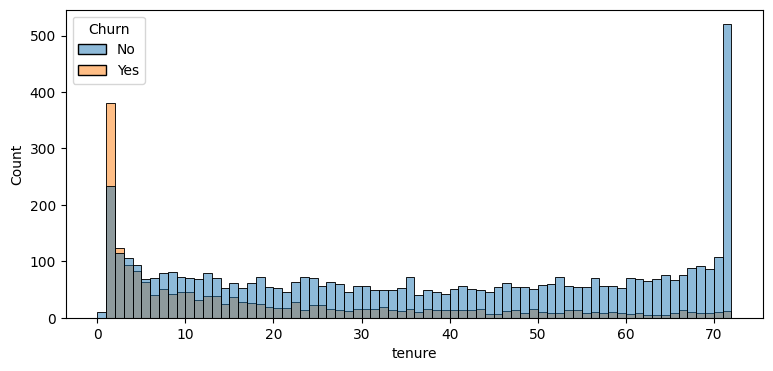

In [23]:
##lets check Churn by tenure
plt.figure(figsize=(9, 4))
sns.histplot(x='tenure',data=df,bins=72,hue='Churn')
plt.show()

Most of the people who churned did so at the initial stage, while those who stayed continued to stay for a long time.

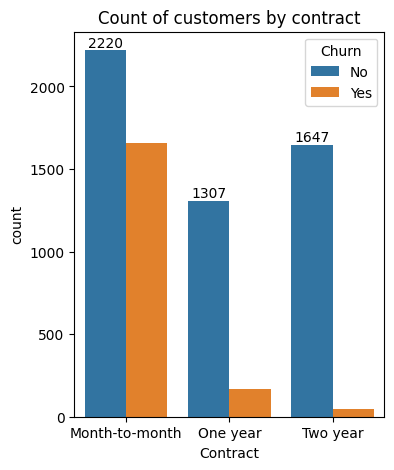

In [24]:
##Lets check on the basis of contract
plt.figure(figsize=(4,5))
ax=sns.countplot(x='Contract',data=df,hue='Churn')
ax.bar_label(ax.containers[0])
plt.title('Count of customers by contract')
plt.show()

People with month-to-month contracts are more likely to churn than those with 1-year or 2-year contracts.

In [25]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13060\2863904998.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=0)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13060\2863904998.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=0)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13060\2863904998.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=0)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13060\2863904998.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xti

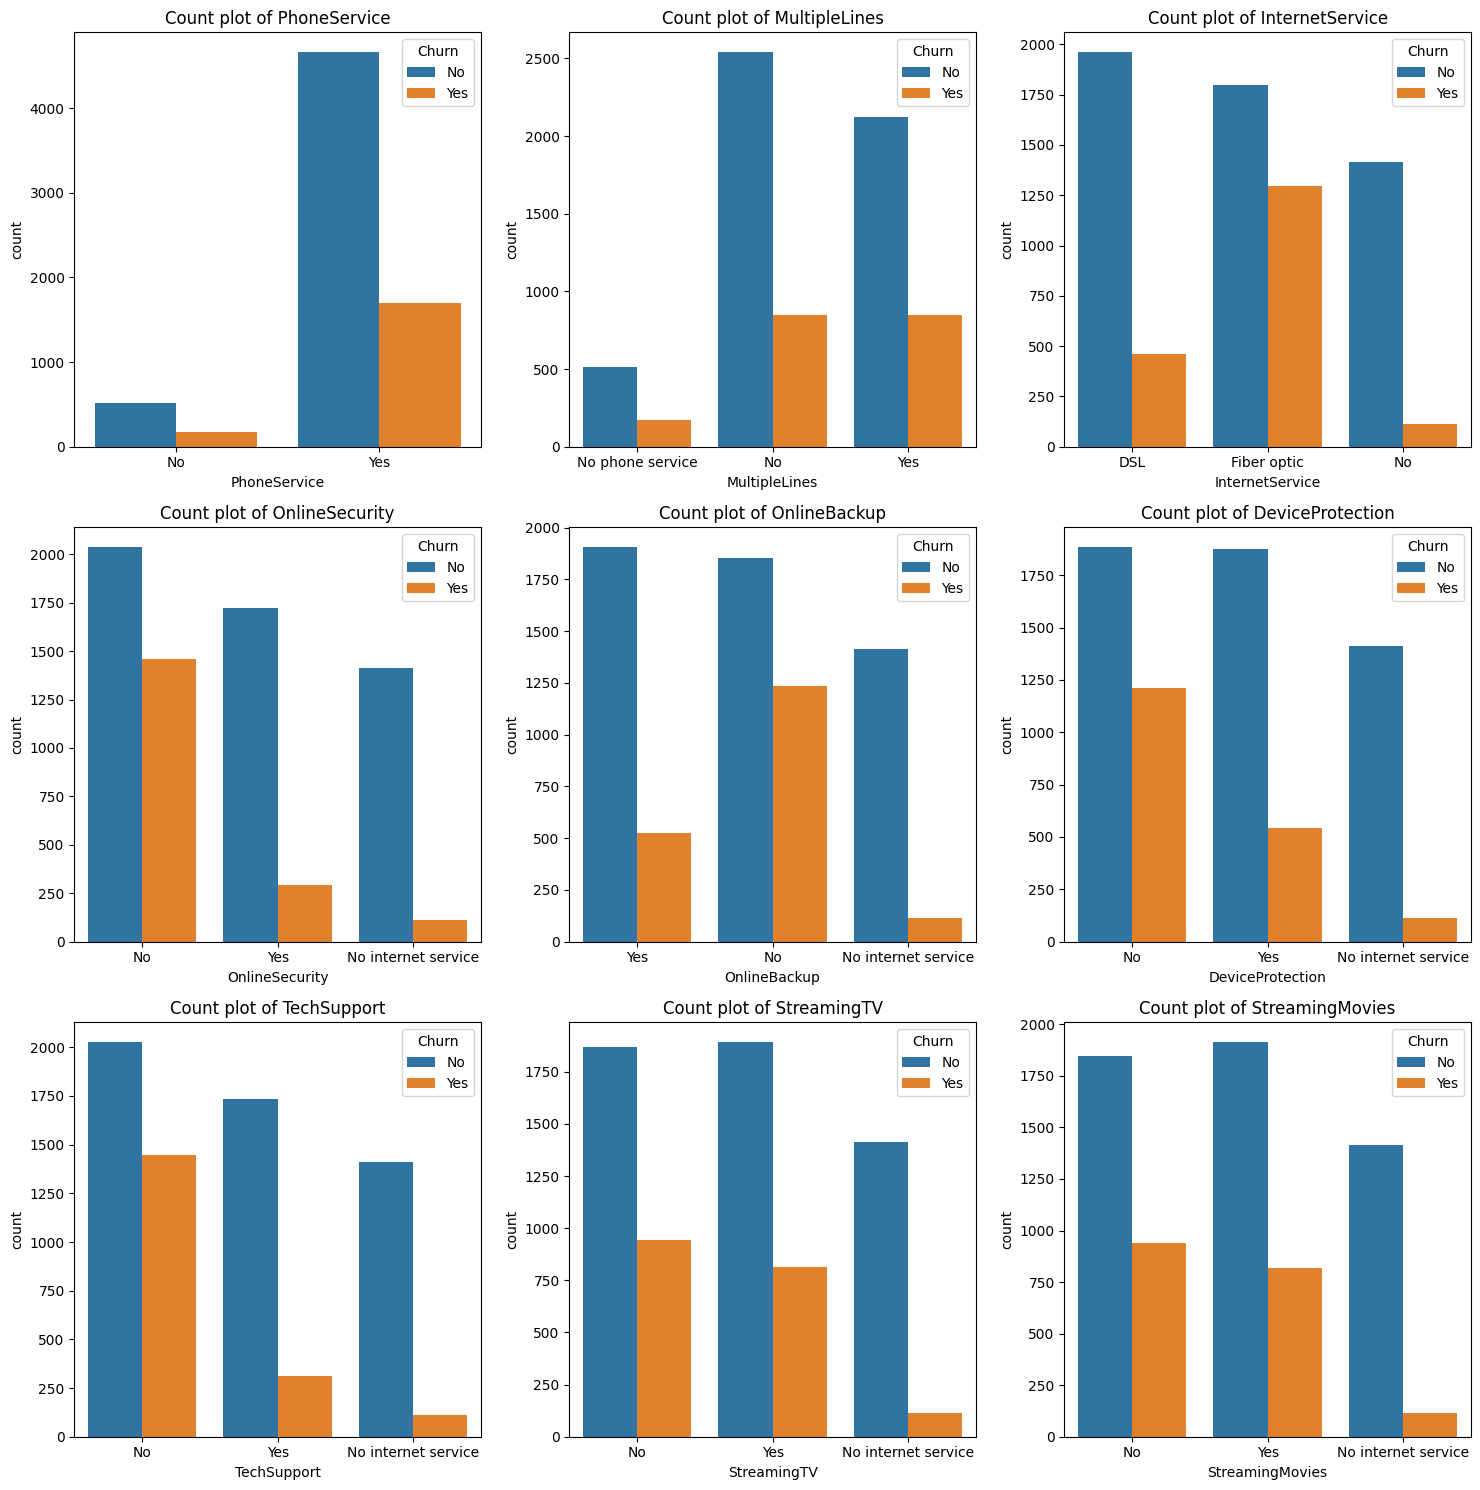

In [26]:
# List of the columns you want to plot
columns = ['PhoneService', 'MultipleLines', 'InternetService',
           'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
           'TechSupport', 'StreamingTV', 'StreamingMovies']

# Assuming your DataFrame is called df
# Set the number of subplots (rows and columns)
n = len(columns)
rows = (n // 3) + (n % 3 > 0)  # Adjust rows to fit 3 columns per row

# Create the subplots
fig, axes = plt.subplots(rows, 3, figsize=(15, 5 * rows))

# Flatten axes array in case there are multiple rows
axes = axes.flatten()

# Loop over the columns and plot count plots
for i, column in enumerate(columns):
    sns.countplot(x=column, data=df, ax=axes[i],hue='Churn')
    axes[i].set_title(f'Count plot of {column}')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=0)

# Remove any empty subplots
for i in range(n, len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

The majority of customers who do not churn tend to have services like PhoneService, InternetService (particularly DSL), and OnlineSecurity enabled. For services like OnlineBackup, TechSupport, and StreamingTV, churn rates are noticeably higher when these services are not used or are unavailable. 

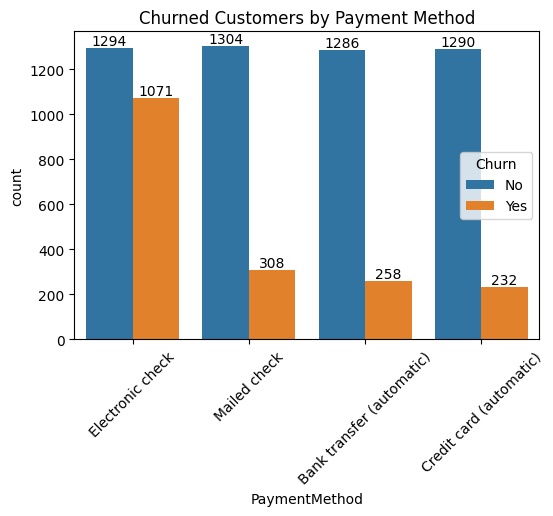

In [27]:
plt.figure(figsize = (6,4))
ax = sns.countplot(x = "PaymentMethod", data = df, hue = "Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Churned Customers by Payment Method")
plt.xticks(rotation = 45)
plt.show()

Customers are more likely to churn when they use electronic checks as their payment method, compared to those who use mail checks, bank transfers, or credit cards.